In [1]:
#Hanfei Geng hgeng4

In [1]:
from scipy import signal
from scipy.io.wavfile import read
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
print "imported ok"

imported ok


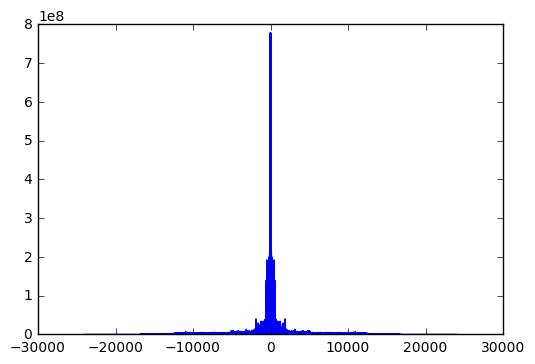

48000


In [2]:
Fs, data = read('test_audio.wav')
data = data[:, 0]

size = len(data)
pi = np.pi
DATA = np.fft.fft(data,size)
DATA = np.fft.fftshift(DATA)

w = 2*pi*(np.fft.fftfreq(size))
w = np.fft.fftshift(w)
analog = Fs * w /2/pi
plt.plot(analog,(np.absolute(DATA)))
plt.show()
print Fs

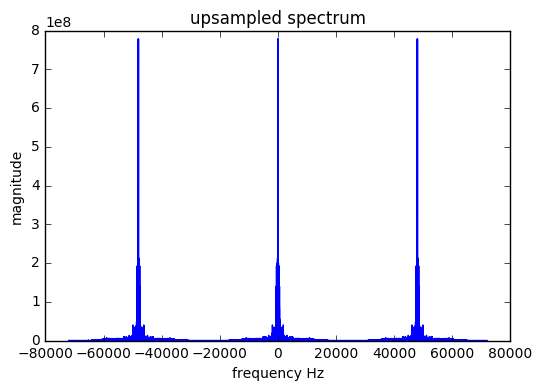

In [3]:
up_ratio = 3
down_ratio = 1

output = np.zeros(up_ratio * len(data))
for i in range(len(data)):
    output[3*i] = data[i]

size = len(output)
pi = np.pi
OUT = np.fft.fft(output,size)
OUT = np.fft.fftshift(OUT)

w = 2*pi*(np.fft.fftfreq(size))
w = np.fft.fftshift(w)
analog = up_ratio * Fs * w /2/pi
plt.plot(analog,(np.absolute(OUT)))
plt.title("upsampled spectrum")
plt.xlabel("frequency Hz")
plt.ylabel("magnitude")
plt.show()

In [49]:
print "upsampled spectrum is shrunk by the up_sampled ratio, and the period is reduced by the up_sampled ratio. In order to preserve the information, we apply a lowpass filter at f = Fs / up_sampled_ratio"

upsampled spectrum is shrunk by the up_sampled ratio, and the period is reduced by the up_sampled ratio. In order to preserve the information, we apply a lowpass filter at f = Fs / up_sampled_ratio


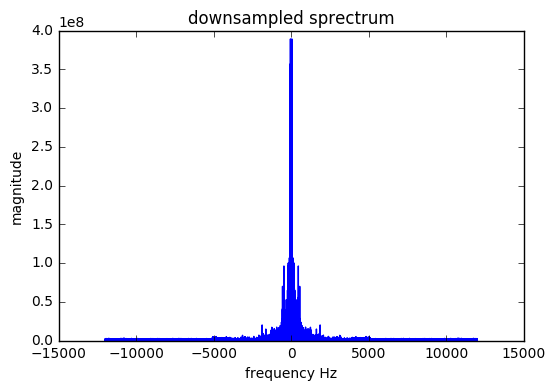

In [4]:
up_ratio = 1
down_ratio = 2
output = np.zeros(len(data)/down_ratio)
for i in range(len(output)):
        output[i] = data[down_ratio * i]

size = len(output)
pi = np.pi
OUT = np.fft.fft(output,size)
OUT = np.fft.fftshift(OUT)

w = 2*pi*(np.fft.fftfreq(size))
w = np.fft.fftshift(w)
analog =  Fs/down_ratio * w /2/pi
plt.plot(analog,(np.absolute(OUT)))
plt.xlabel("frequency Hz")
plt.ylabel("magnitude")
plt.title("downsampled sprectrum")
plt.show()

In [51]:
print '''the downsampled spectrum is stretch by a factor of the down_sampled ratio and magnitude is reduced by 
the down_sampled ratio. We prevent alasing by limiting the down_sampled ratio'''

the downsampled spectrum is stretch by a factor of the down_sampled ratio and magnitude is reduced by 
the down_sampled ratio. We prevent alasing by limiting the down_sampled ratio


In [5]:
Fs, data = read('test_audio.wav')
data = data[:, 0]

up_ratio = 1
down_ratio = 2

output = signal.resample_poly(data, up_ratio, down_ratio)

Audio(output, rate=Fs)

In [6]:
print '''ratio : 2
the vocal characteristic slows down. It sounds really draggy
ratio : 1
the singer sounds normal
ratio : 1/2
the singer sounds really fast'''

ratio : 2
the vocal characteristic slows down. It sounds really draggy
ratio : 1
the singer sounds normal
ratio : 1/2
the singer sounds really fast
